# Predict heart disease using the Machine Learning

This is a capstone project in my complet AI and machine learning course. The goal is to create a machine learning model to predict heart disease based on a dataset provided by UCI Machine Learning Repository.

We have the following approach:

1. Problem defininition 
2. Data
3. Evalutation metrics
4. Feauteres
5. Modelling 
6. Experimentation




### 1. Problem Definition
can we out of some clinical features in our data predict whether a person has heart disease or not?

### 2. Data
The dataset: [Heart Disease UCI](https://archive.ics.uci.edu/ml)

Variable Information
Only 14 attributes used:
      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)        
      4. #10 (trestbps)  
      5. #12 (chol)      
      6. #16 (fbs)       
      7. #19 (restecg)   
      8. #32 (thalach)   
      9. #38 (exang)     
      10. #40 (oldpeak)   
      11. #41 (slope)     
      12. #44 (ca)        
      13. #51 (thal)      
      14. #58 (num)


### 3. Evaluation metrics
Our goal is to create a model that can accurately predict whether a person has heart disease or not with an accuracy of at least 95%.

### 4. Features
this is where we get the information about each feature in our dataset. 
*Create a data dictonary

      *(age)    Year
      *(sex)   1= male, 0= female    
      *(cp)    Chest pain type    
      *(trestbps)  Blood pressure (in mm Hg on admission to the hospital)
      *(chol)      cholestrol (in mg/dl)
      *(fbs)       fabs (fasting blood sugar > 120 mg/dl)  (1 = True, 0 = False)
      *(restecg)   resting electrocardiographic results    
      *(thalach)   talach max-heart rate archived
      *(exang)     induced angina (1 = yes, 0 = no)
      *(oldpeak)   old peak exercise ST segment depression
      *(slope)     slope of the peak exercise ST segment
      *(ca)        canumer number of major vessels (0-3) colored by fluoroscopy
      *(thal)      thal3 value (3 = normal, 6 = fixed defect, 7 = reversable defect)
      *(num)       target variable (0=no heart disease, 1=yes heart disease)**


Get our tools ready

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score


# import models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# import evaluation metrics

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay




In [8]:
# mporting the dataset
data = pd.read_csv("/Users/glenn/machinelearning_course/mlcource/data/heart-disease.csv")
data.shape

(303, 14)

### EDA
The goal her is to find more about the data and see if we can gain any insights.
1. what problem are we trying to solve?
2. what kind of data are we working with?
3. how many missing values are there? and how to deal with them?
4. where are the potensial outliers? and how to handle them?
5. how can we add, change or remove features to the dataset?


In [9]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
# Our goal is to predict the target column so we focus on that. want to see how many of each class there are.
data["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

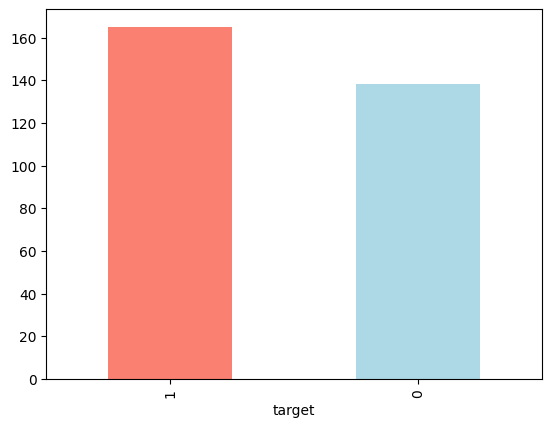

In [17]:
# easyer to visulate it. 
data["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
# Do we miss any data 
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
# we want to see how many unique there are of man and women
data["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [25]:
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


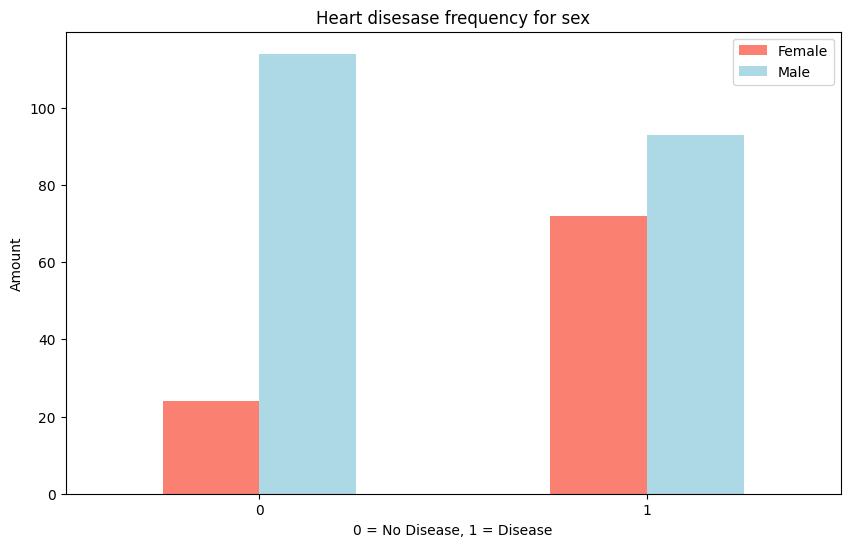

In [29]:
# Want to visulate it 
pd.crosstab(data.target, data.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"]);
plt.title("Heart disesase frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs max heart rate

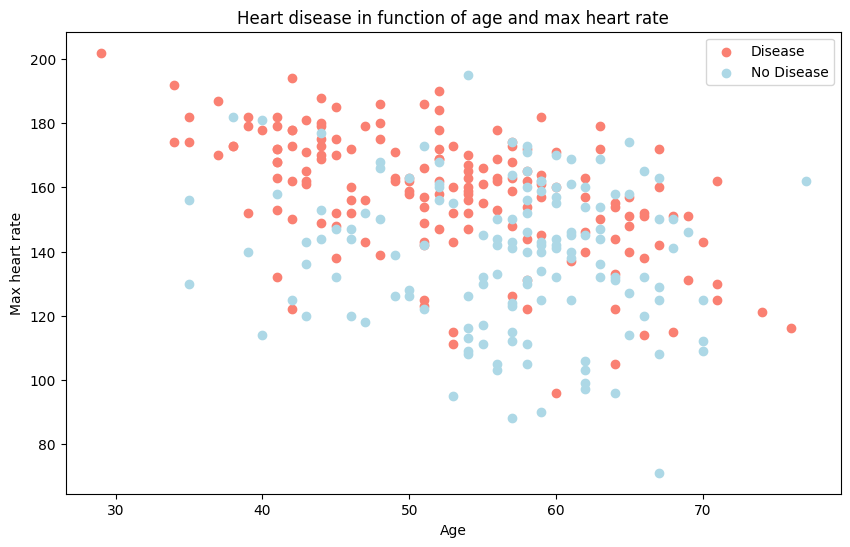

In [36]:
plt.figure(figsize=(10, 6) )
plt.scatter(data.age[data.target==1], data.thalach[data.target==1], c="salmon")
plt.scatter(data.age[data.target==0], data.thalach[data.target==0], c="lightblue")
plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease", "No Disease"]);


<Axes: ylabel='Frequency'>

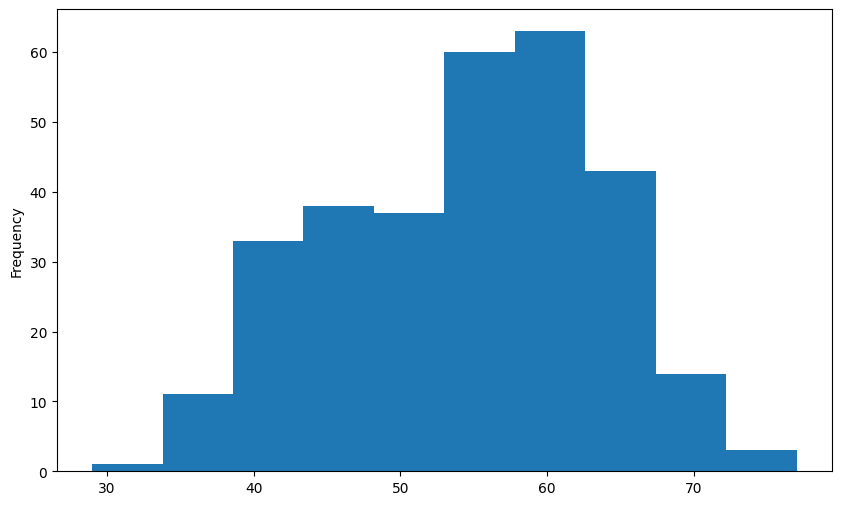

In [40]:
# Cheek the distribution of age in a histogram
data.age.plot(kind="hist", bins=10, figsize=(10, 6))

### Heart disease frequency per chest pain type

In [45]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


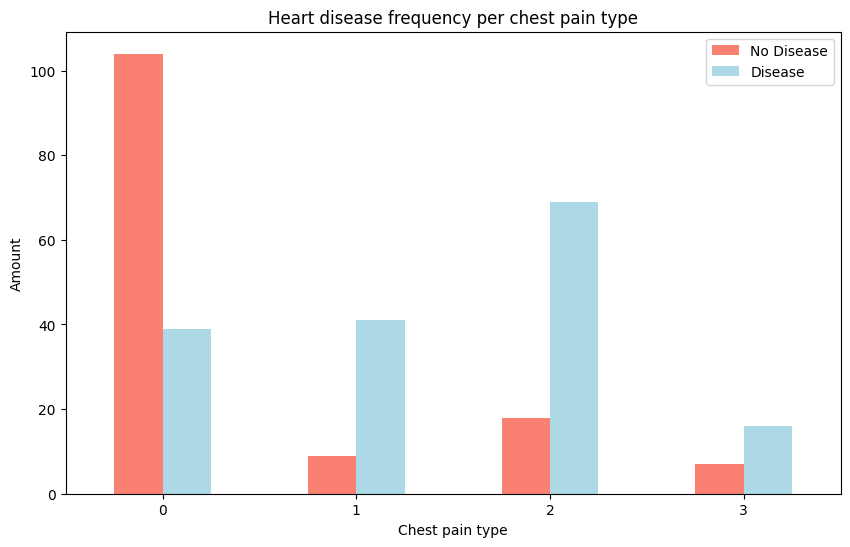

In [46]:
pd.crosstab(data.cp, data.target).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

### Make a corelation matrix


In [50]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


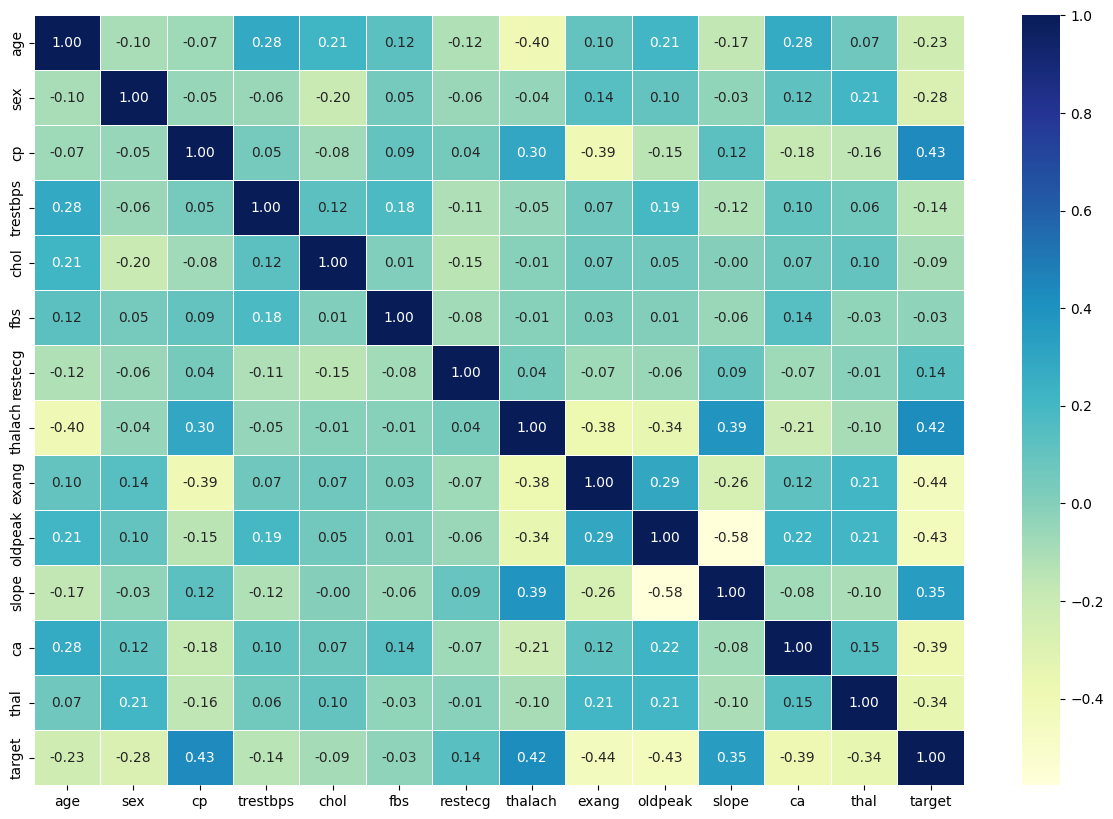

In [51]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)

### Modeling for Machine Learning

In [53]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
# Split the data into x, y 
x = data.drop("target", axis=1)
y= data["target"]

# See x and y
x.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [56]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [57]:
# split data into train and test sets
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [59]:
# Look at x_train and y_train
x_train.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [60]:
y_train.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

In [61]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

### Choose the model 
we are going to try 3 different models:
1. logistic Regression
2. K-Nearest Neighbors (KNN)
3. Random Forest Classifier

In [64]:
models = {"LogisticRegression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "RandomForestClassifier": RandomForestClassifier()}
# Create a function to fit and score models
def fit_and_score_models(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    #make a dictonary so store our model score 
    models_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append the score to the dictonary
        models_scores[name] = model.score(x_test, y_test)
    return models_scores

In [65]:
model_scores = fit_and_score_models(models=models, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_scores

/Users/glenn/machinelearning_course/mlcource/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

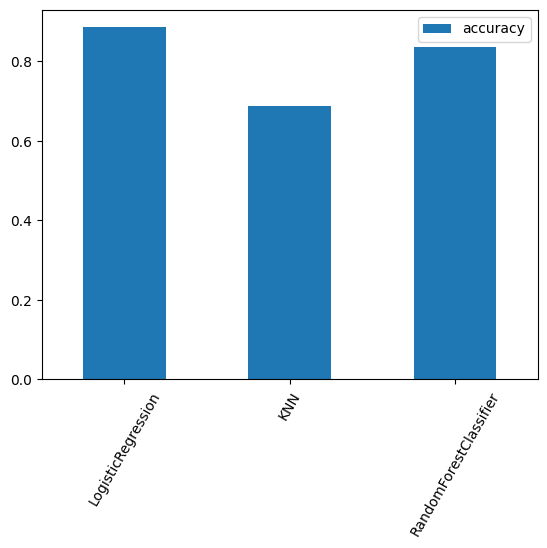

In [69]:
# let's visualize our model scores
model_comaprerison = pd.DataFrame(model_scores, index=["accuracy"])
model_comaprerison.T.plot.bar()
plt.xticks(rotation=60);

We know that Logistic Regression and Random Forest Classifier are performing well. But we also know that we shall never just go with first model, we should try to improve the performance of our best model.
Lets look into:
1. Hyperparameter tuning
2. feature importance
3. cross-validation
4. Precision
5. recall
6. F1 score
7. ROC
8. AUC curve

### Hyperparameter tuning ( by hand/manually)

In [77]:
# Tuning KNN
train_scores = []
test_scores = []
# Create a list of different values for n_neighbors to test 
neighbors = range(1, 21)
# setup knn instances 
knn = KNeighborsClassifier() 

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm to the training data 
    knn.fit(x_train, y_train)
    
    # update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # update the test scores list
    test_scores.append(knn.score(x_test, y_test))

    



In [78]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

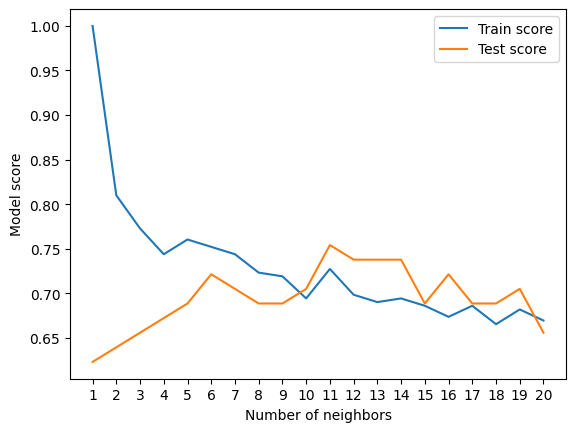

In [79]:
# Plot the training and test scores
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.show()

We can see if even if we change the model to 11 neighboars it is still a long way from the score of the Random Forest Classifier or LogisticRegression . So we descide to drop Knearest neigbour model. to solv our proble we have set a goal to 95 % accuracy. We try some more tuning methods to see if we can improve our model.

### Hyperparameter tuning with RandomizedSearchCV


We are going to tune:
1. logisticRegression:
2. RandomForestClassifier:
Using RandomizedSearchCV to perform hyperparameter tunig 

In [80]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"],
                "penalty": ["l1", "l2"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5,10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


# Setup randomized search cv for LogisticRegression

                

In [81]:
# Tune LogisticRegression
np.random.seed (42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True) 
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [82]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': np.float64(0.23357214690901212)}

In [83]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

Now we tuned Logistic Regression model and got an accuracy of 88.52% 
Lets try tuning RandomForestClassifier

In [84]:
# Random seed 
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True) 
# Fit random hyperparameter search model for RandomForestClassifier

rs_rf.fit(x_train, y_train)                             

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [85]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [86]:
# Evalute the randomizedq search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.8688524590163934

In [87]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

Even after tuning our models it look like Logistic regresion is the model we should go for her 

### Hyperparameter tuning with gridSearchCV 

In [88]:
# different hyperparameters for logistic regression model 
log_reg_grid = {"C": np.logspace(-4, 4, 30),"solver": ["liblinear"]}

# Setup grid search cv for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid, cv=5, verbose=True)

# Fit grid search cv model for LogisticRegression
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [89]:
# Cheek the best parameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [90]:
# evaluate the grid search cv LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [91]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

### Evaluating our tuned machine learning clasifier  beyond accuracy

* Roc_curve and AUC score 
* confusion matrix
* classification report
* presiscion 
* recall
* f1_score


In [93]:
# make predictions with tuned model 
y_preds = gs_log_reg.predict(x_test)


/Users/glenn/machinelearning_course/mlcource/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


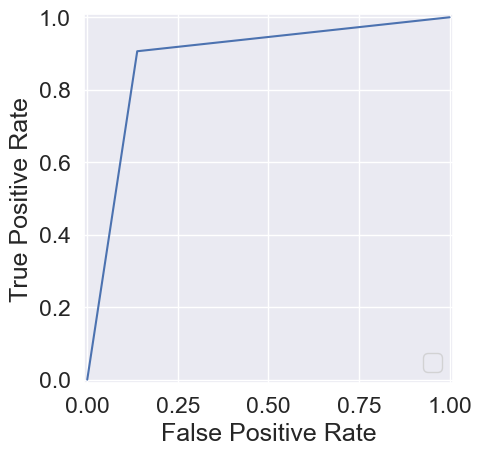

In [110]:
from sklearn.metrics import RocCurveDisplay, roc_curve

fpr, tpr, _ = roc_curve(y_test, y_preds)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.show()

In [111]:
# confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


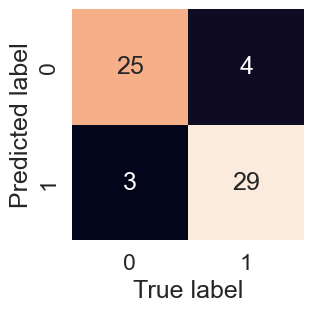

In [113]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.ylabel("Predicted label") # predictions go on the x-axis
    plt.xlabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [114]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Thing to remeber her is that this score is just on the 20 percent of the training data. we should use cross-validation to get a more accurate score.
Calculate evaluation metric using cross-validation

In [115]:
# Cheek best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [117]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')


In [118]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [119]:
# Cross-validated precision score
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [120]:
# Cross-validated recall score
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9272727272727274)

In [121]:
# cross-validated f1 score
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

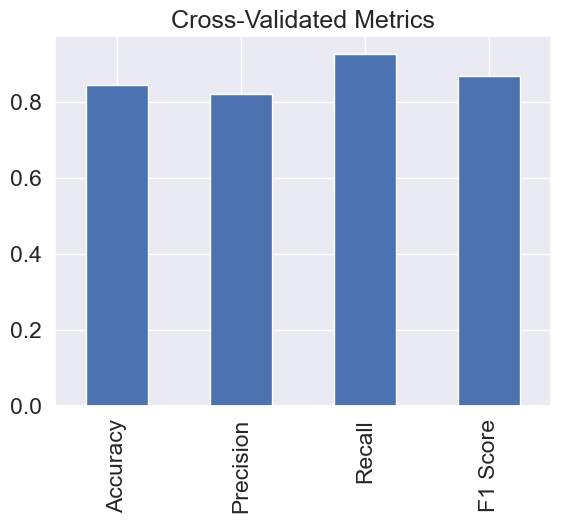

In [123]:
# visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1 Score": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

### Feature importance
Wich feature of our dataset is most important for determining whether a person has heart disease or not. 
Finding feauture importance is different for different machine learning models.
One way is to search for the (model name) importance attribute and display it.

Feature importance for Logistic Regression:


In [125]:
# Fit and instance of logistic regression
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [133]:
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [129]:
# cheek coefficients of features

gs_log_reg.best_estimator_.coef_

array([[ 0.00316728, -0.86044632,  0.66067049, -0.01156993, -0.00166374,
         0.04386113,  0.31275831,  0.02459361, -0.60413069, -0.56862816,
         0.45051625, -0.63609888, -0.67663372]])

In [131]:
# match coef of feauters to columns
feature_dict = dict(zip(data.columns, list(gs_log_reg.best_estimator_.coef_[0])))
feature_dict

{'age': np.float64(0.0031672781327894174),
 'sex': np.float64(-0.8604463225434887),
 'cp': np.float64(0.6606704880663327),
 'trestbps': np.float64(-0.011569930973982082),
 'chol': np.float64(-0.0016637444348091125),
 'fbs': np.float64(0.04386112916612732),
 'restecg': np.float64(0.31275831401797016),
 'thalach': np.float64(0.02459361287884811),
 'exang': np.float64(-0.6041306886708714),
 'oldpeak': np.float64(-0.5686281582626643),
 'slope': np.float64(0.4505162473877666),
 'ca': np.float64(-0.6360988802173348),
 'thal': np.float64(-0.6766337223853063)}

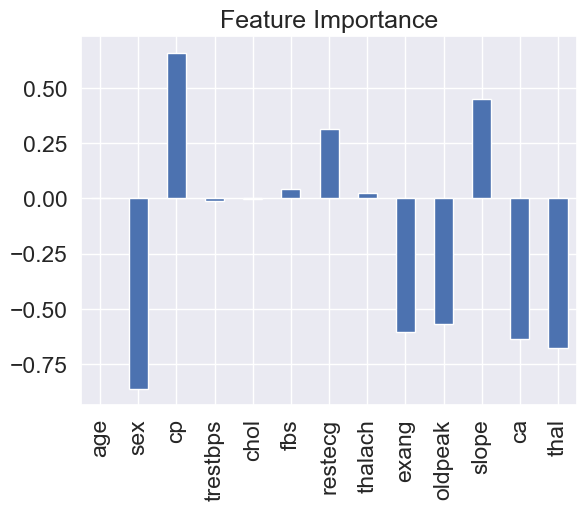

In [134]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);



# Here's an interpretation of the coefficients for our model

* 'age': The coefficient is approximately 0.003, which is very small. This suggests that age has a very weak positive impact on the prediction of heart disease.
* 'sex': The coefficient is approximately -0.860, which is quite large and negative. This indicates that being a male (represented by 1 in the dataset) negatively contributes to the prediction of heart disease.
* 'cp': The coefficient is approximately 0.660, which is quite large and positive. This suggests that chest pain type (cp) positively contributes to the prediction of heart disease.
* 'trestbps': The coefficient is approximately -0.011, which is very small and negative. This suggests that resting blood pressure (trestbps) has a very weak negative impact on the prediction of heart disease.
* 'chol': The coefficient is approximately -0.001, which is very small and negative. This suggests that cholesterol (chol) has a very weak negative impact on the prediction of heart disease.
* 'fbs': The coefficient is approximately 0.043, which is small and positive. This suggests that fasting blood sugar (fbs) positively contributes to the prediction of heart disease.
* 'restecg': The coefficient is approximately 0.312, which is quite large and positive. This suggests that resting electrocardiographic results (restecg) positively contribute to the prediction of heart disease.
* 'thalach': The coefficient is approximately 0.024, which is small and positive. This suggests that maximum heart rate (thalach) has a very weak positive impact on the prediction of heart disease.
* 'exang': The coefficient is approximately -0.604, which is quite large and negative. This indicates that exercise induced angina (exang) negatively contributes to the prediction of heart disease.
* 'oldpeak': The coefficient is approximately -0.568, which is quite large and negative. This suggests that ST depression induced by exercise relative to rest (oldpeak) negatively contributes to the prediction of heart disease.
* 'slope': The coefficient is approximately 0.450, which is quite large and positive. This suggests that the slope of the peak exercise ST segment (slope) positively contributes to the prediction of heart disease.
* 'ca': The coefficient is approximately -0.636, which is quite large and negative. This indicates that the number of major vessels colored by fluoroscopy (ca) negatively contributes to the prediction of heart disease.
* 'thal': The coefficient is approximately -0.676, which is quite large and negative. This suggests that thalassemia (thal) negatively contributes to the prediction of heart disease.

# Experimenting with different feature combinations, to reach higher accuracy

### Things to take in to consider, if we should continue our project to reach project goal of 95% accuracy:

We havent reach our goal of 95% in our model. What can we do to improve our model?
* is it posible to get more data ? 
* colud we try a bethe model? maybe catboost or xgboost?
* Could we improve the curent model more beyond what we have done ?  
* Share your model with others to see if they can improve it?


